Case Studies

Project: 1

Group: 3

Group Members:
 - Muhammad Raafey Tariq (231806)
 - Farrukh Ahmed (230614)
 - Amirreza Khamehchin Khiabani (230891)
 - Aymane Hachcham (236392)


Requirements:
 - numpy==1.24.2
 - matplotlib==3.7.1
 - seaborn==0.12.2
 - pandas==2.0.0
 - openpyxl==3.1.2

Installation Commands (One-time only)
 - pip install pandas==2.0.0
 - pip install numpy==1.24.2
 - pip install seaborn==0.12.2
 - pip install matplotlib==3.7.1
 - pip install openpyxl==3.1.2

Imports and Libraries

In [1]:
import pandas as pd
import numpy as np
import itertools
import pprint
from helper_functions import read_data, format_variables
# used for the graphs
import seaborn as sns
import os
sns.set(font_scale = 1.2)

# used for plotting
from matplotlib import pyplot as plt
import matplotlib

# setting font to 'Times New Roman'
matplotlib.rcParams["font.family"] = "Times New Roman"
matplotlib.rcParams.update({'font.size': 16})
%matplotlib inline

Global Variables and Constants

In [25]:
MAIN_PLOT_DIR_NAME = "Descriptive_analysis_plots"
BOX_PLOT_DIR_NAME = "Box-plots"
BAR_PLOT_DIR_NAME = "Bar-plots"
MOSAIC_PLOT_DIR_NAME = "Mosaic-plots"
HIST_DIR_NAME = "Histograms"
MISC_PLOT_DIR_NAME = "Miscellaneous"
PLOT_COLOR = "blue"
boxplot_dir_path = os.path.join(MAIN_PLOT_DIR_NAME, BOX_PLOT_DIR_NAME)
barplot_dir_path = os.path.join(MAIN_PLOT_DIR_NAME, BAR_PLOT_DIR_NAME)
mosaic_dir_path = os.path.join(MAIN_PLOT_DIR_NAME, MOSAIC_PLOT_DIR_NAME)
misc_dir_path = os.path.join(MAIN_PLOT_DIR_NAME, MISC_PLOT_DIR_NAME)
hist_dir_path = os.path.join(MAIN_PLOT_DIR_NAME, HIST_DIR_NAME)

Creating Necessary directories for plots

In [26]:
if not os.path.isdir(MAIN_PLOT_DIR_NAME):
    os.mkdir(MAIN_PLOT_DIR_NAME)
if not os.path.isdir(boxplot_dir_path):
    os.mkdir(boxplot_dir_path)
if not os.path.isdir(barplot_dir_path):
    os.mkdir(barplot_dir_path)
if not os.path.isdir(mosaic_dir_path):
    os.mkdir(mosaic_dir_path)
if not os.path.isdir(misc_dir_path):
    os.mkdir(misc_dir_path)
if not os.path.isdir(hist_dir_path):
    os.mkdir(hist_dir_path)

Importing Data

In [9]:
data_df = read_data()

c:\Users\Raafe\AppData\Local\Programs\Python\Python38\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [10]:
data_df.dtypes

id                              int64
zeit                   datetime64[ns]
terminal                        int64
postleitzahl                  float64
gemeinde                       object
bezirk                         object
bundesland                     object
befinden                      float64
geburtsjahr                   float64
geschlecht                     object
raucher                          bool
blutzucker_bekannt               bool
cholesterin_bekannt              bool
in_behandlung                    bool
schaetzwert_bp_sys            float64
schaetzwert_by_dia            float64
messwert_bp_sys                 int64
messwert_bp_dia                 int64
dtype: object

Reformating Columns to Correct Data Types

In [11]:
data_df, cat_feats, num_feats = format_variables(data=data_df, to_filter=[], drop_values=False)

In [12]:
data_df.head()

,id,zeit,terminal,postleitzahl,gemeinde,bezirk,bundesland,befinden,geburtsjahr,geschlecht,...,schaetzwert_by_dia,messwert_bp_sys,messwert_bp_dia,is_local_resident,age,age_group,is_missing_schaetzwert_bp_sys,is_missing_schaetzwert_by_dia,bp_category_messwert,bp_category_schaetzwert
0,26557,2006-08-30 10:33:29,1,8010.0,Graz - Jakomini,Graz(Stadt),Steiermark,2.0,1974,f,...,90.0,122.0,68.0,True,32,adult,False,False,Elevated,HyperTension Stage 2
1,30797,2006-10-04 15:16:30,3,8113.0,Sankt Bartholomä,Graz-Umgebung,Steiermark,2.0,1938,m,...,80.0,134.0,81.0,True,68,65 over,False,False,HyperTension Stage 1,HyperTension Stage 1
2,30134,2006-09-28 10:49:24,2,8573.0,Kohlschwarz,Voitsberg,Steiermark,2.0,1978,f,...,70.0,104.0,68.0,True,28,adult,False,False,Normal,Elevated
3,30014,2006-09-26 13:19:04,1,8570.0,Voitsberg,Voitsberg,Steiermark,3.0,1989,m,...,80.0,167.0,88.0,True,17,teenager,False,False,HyperTension Stage 1,HyperTension Stage 1
4,19766,2006-07-08 17:00:32,3,8580.0,Köflach,Voitsberg,Steiermark,1.0,1955,m,...,85.0,128.0,92.0,True,51,adult,False,False,HyperTension Stage 2,HyperTension Stage 1


In [13]:
print("Number of datapoints: ", len(data_df))
print("Number of variables: ", len(data_df.columns))
data_df.columns

Number of datapoints:  16386
Number of variables:  25


Index(['id', 'zeit', 'terminal', 'postleitzahl', 'gemeinde', 'bezirk',
       'bundesland', 'befinden', 'geburtsjahr', 'geschlecht', 'raucher',
       'blutzucker_bekannt', 'cholesterin_bekannt', 'in_behandlung',
       'schaetzwert_bp_sys', 'schaetzwert_by_dia', 'messwert_bp_sys',
       'messwert_bp_dia', 'is_local_resident', 'age', 'age_group',
       'is_missing_schaetzwert_bp_sys', 'is_missing_schaetzwert_by_dia',
       'bp_category_messwert', 'bp_category_schaetzwert'],
      dtype='object')

Missing Values

In [14]:
# Counts for missing values per column
data_df.isna().sum()

id                                0
zeit                              0
terminal                          0
postleitzahl                      0
gemeinde                          0
bezirk                            0
bundesland                        0
befinden                          0
geburtsjahr                      23
geschlecht                        0
raucher                           0
blutzucker_bekannt                0
cholesterin_bekannt               0
in_behandlung                     0
schaetzwert_bp_sys               45
schaetzwert_by_dia               56
messwert_bp_sys                   0
messwert_bp_dia                   0
is_local_resident                 0
age                              23
age_group                         0
is_missing_schaetzwert_bp_sys     0
is_missing_schaetzwert_by_dia     0
bp_category_messwert              0
bp_category_schaetzwert           0
dtype: int64

In [23]:
# identifying number of foriegners

data_df.is_local_resident.value_counts()

is_local_resident
True     16055
False      331
Name: count, dtype: int64

Statistics

In [17]:
summary = round(data_df[num_feats].describe(), 2)
summary

,id,zeit,terminal,geburtsjahr,schaetzwert_bp_sys,schaetzwert_by_dia,messwert_bp_sys,messwert_bp_dia,age
count,16386.00,16386,16386.00,16363.0,16341.00,16330.00,16386.00,16386.00,16363.0
mean,23172.17,2006-08-03 19:02:11.527462144,1.92,1963.87,122.41,79.86,124.10,82.04,42.13
min,11519.00,2006-04-27 10:49:12,1.00,1880.0,34.00,30.00,43.00,27.00,0.0
25%,17978.25,2006-06-17 12:27:35.250000,1.00,1950.0,115.00,75.00,110.00,73.00,27.0
50%,23345.50,2006-08-08 14:29:51.500000,2.00,1962.0,120.00,80.00,123.00,81.00,44.0
75%,28781.75,2006-09-16 14:22:10.249999872,3.00,1979.0,130.00,85.00,137.00,90.00,56.0
max,34703.00,2006-11-06 09:55:33,3.00,2006.0,299.00,212.00,217.00,197.00,126.0
std,6556.96,NaN,0.82,18.53,16.94,9.96,19.68,14.64,18.53


Histograms

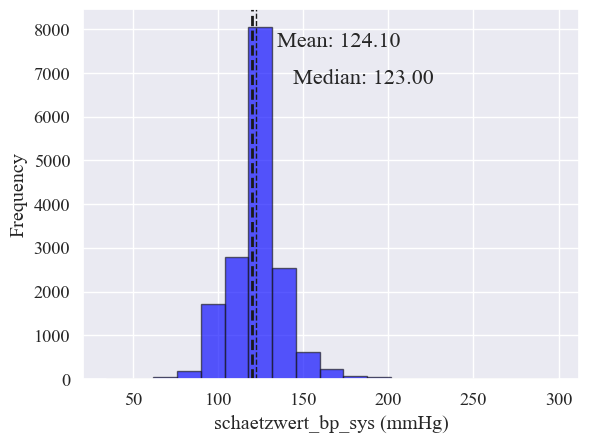

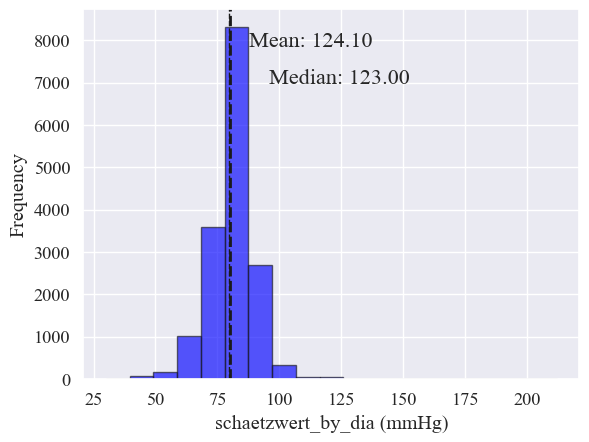

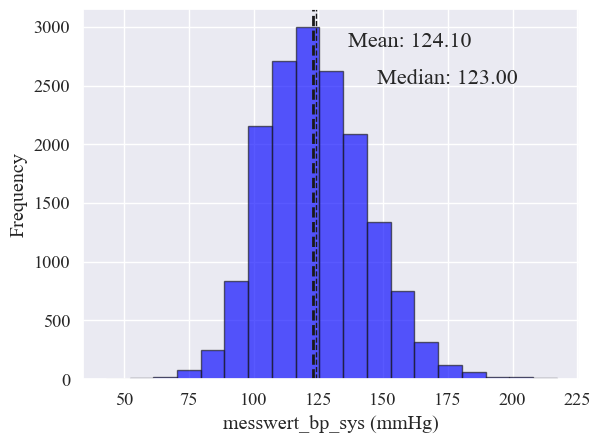

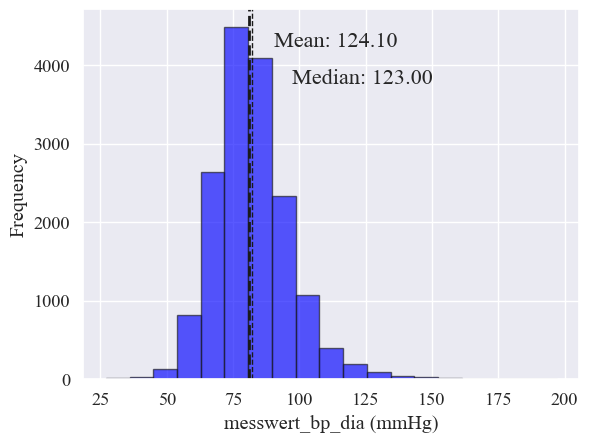

In [40]:
def create_histogram(data_df, col_name):
    min_value = data_df[col_name].min()
    max_value = data_df[col_name].max()
    bins = np.linspace(min_value,max_value,20)

    result = plt.hist(data_df[col_name], bins = bins, color=PLOT_COLOR, edgecolor='k', alpha=0.65)
    plt.axvline(data_df[col_name].mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(data_df[col_name].median(), color='k', linestyle='dashed', linewidth=2)

    min_ylim, max_ylim = plt.ylim()
    plt.text(data_df[col_name].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(data_df['messwert_bp_sys'].mean()))
    plt.text(data_df[col_name].median()*1.2, max_ylim*0.8, 'Median: {:.2f}'.format(data_df['messwert_bp_sys'].median()))
    plt.xlabel(col_name + ' (mmHg)')
    plt.ylabel("Frequency")
    plt.savefig(os.path.join(hist_dir_path, col_name + "_Hist.pdf"), dpi=180, bbox_inches='tight')
    plt.show()

columns = ["schaetzwert_bp_sys", "schaetzwert_by_dia", "messwert_bp_sys", "messwert_bp_dia"]

for col in columns:
    create_histogram(data_df, col)

Bar plots

geschlecht
f          9190
m          7173
unknown      23
Name: count, dtype: int64


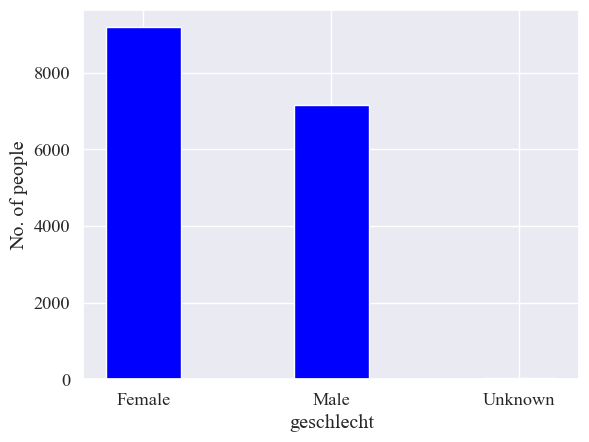

bundesland
Steiermark          14373
Wien                  501
Niederösterreich      469
not applicable        331
Oberösterreich        224
Kärnten               188
Burgenland            122
Salzburg               82
Tirol                  68
Vorarlberg             28
Name: count, dtype: int64


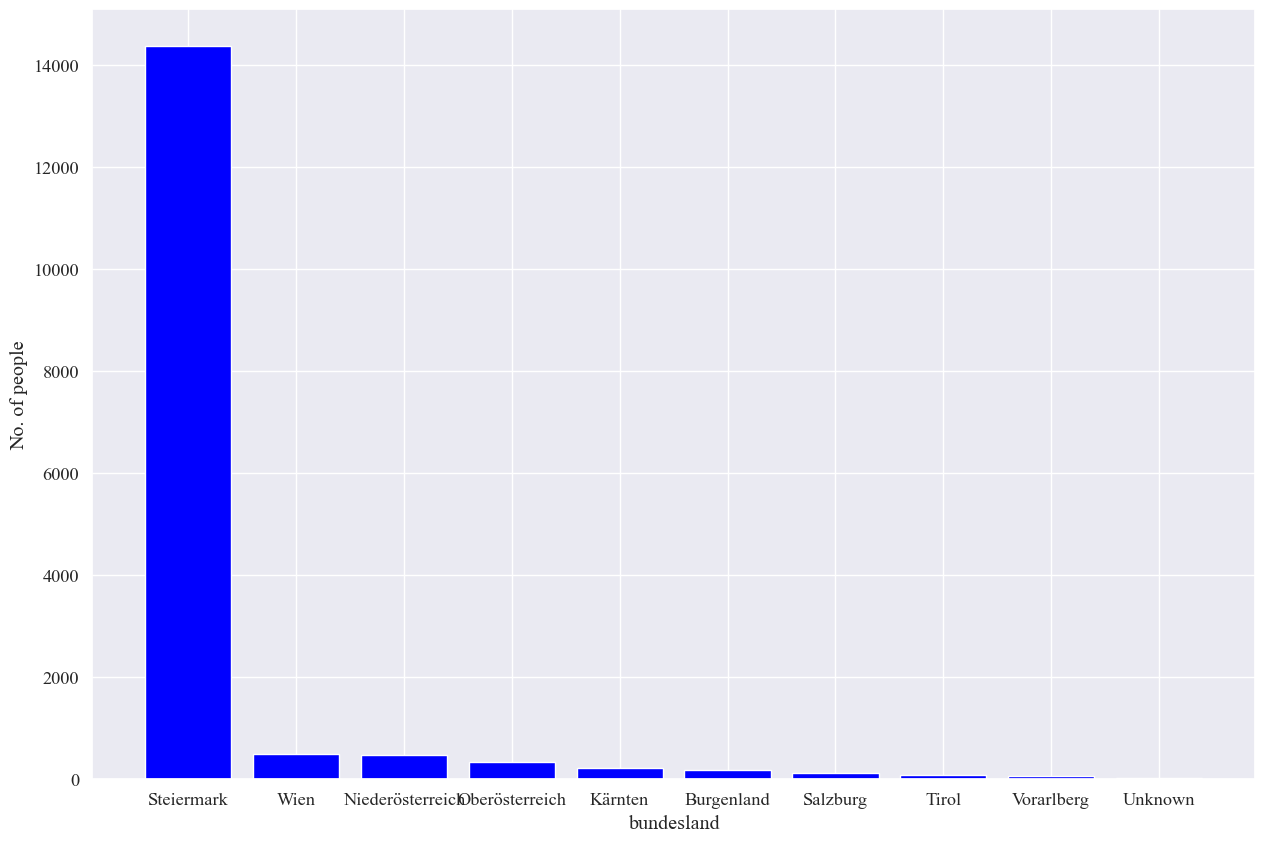

raucher
False      13888
True        2475
unknown       23
Name: count, dtype: int64


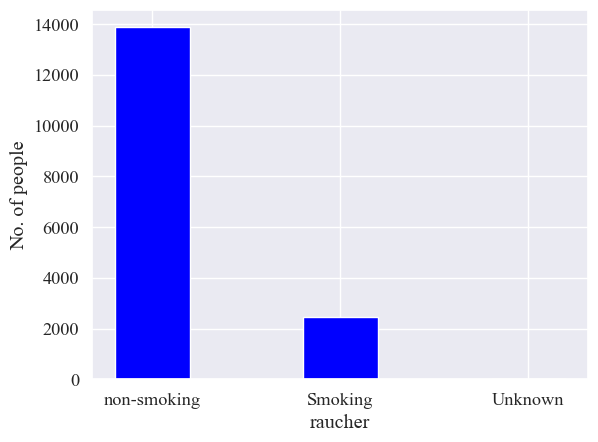

blutzucker_bekannt
False      12276
True        4087
unknown       23
Name: count, dtype: int64


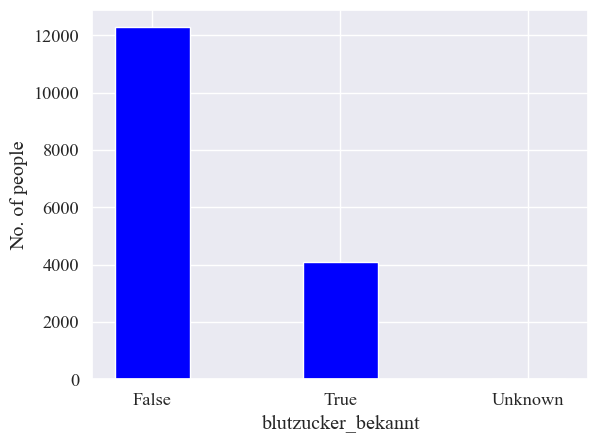

cholesterin_bekannt
False      10636
True        5727
unknown       23
Name: count, dtype: int64


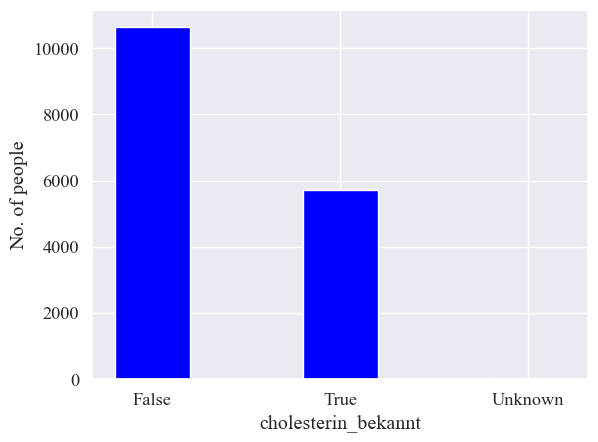

in_behandlung
False      14321
True        2042
unknown       23
Name: count, dtype: int64


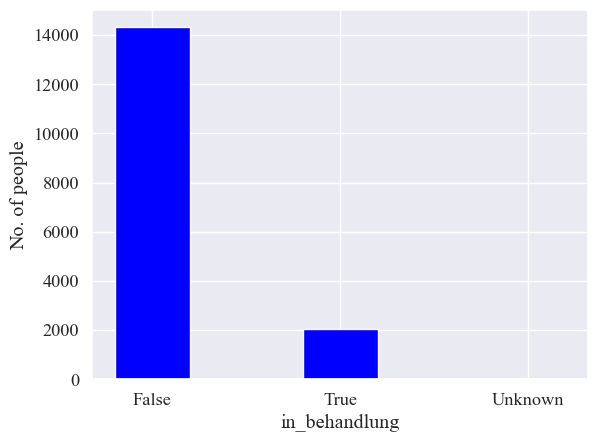

befinden
2.0        7931
1.0        5897
3.0        2240
4.0         198
5.0          97
unknown      23
Name: count, dtype: int64


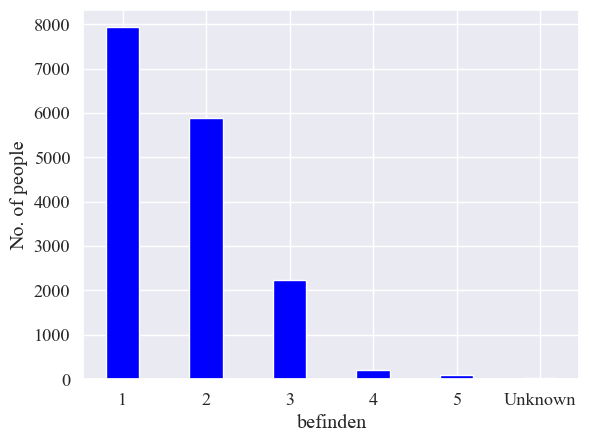

In [32]:
# creating the bar plot Genders
print(data_df['geschlecht'].value_counts())
plt.bar(["Female", "Male", "Unknown"], data_df['geschlecht'].value_counts(), color =PLOT_COLOR,
        width = 0.4)

plt.xlabel('geschlecht')
plt.ylabel("No. of people")
# plt.title("Bar plot of sex distribution")
plt.savefig(os.path.join(barplot_dir_path, "sex_distribution_Bar.pdf"), dpi=180, bbox_inches='tight')
plt.show()

# creating the bar plot states
print(data_df['bundesland'].value_counts())

fig = plt.figure(figsize = (15, 10))
plt.bar(["Steiermark", "Wien", "Niederösterreich", "Oberösterreich", "Kärnten", "Burgenland", "Salzburg", "Tirol", "Vorarlberg", "Unknown"], data_df['bundesland'].value_counts(), color =PLOT_COLOR)
 
plt.xlabel('bundesland')
plt.ylabel("No. of people")
# plt.title("Bar plot of state distribution")
plt.savefig(os.path.join(barplot_dir_path, "state_distribution_Bar.pdf"), dpi=180, bbox_inches='tight')
plt.show()


# creating the bar plot smoking
print(data_df['raucher'].value_counts())
plt.bar(["non-smoking", "Smoking", "Unknown"], data_df['raucher'].value_counts(), color =PLOT_COLOR, width=0.4)
 
plt.xlabel("raucher")
plt.ylabel("No. of people")
# plt.title("Bar plot of smoking distribution")
plt.savefig(os.path.join(barplot_dir_path, "smoking_distribution_Bar.pdf"), dpi=180, bbox_inches='tight')
plt.show()

print(data_df['blutzucker_bekannt'].value_counts())
plt.bar(["False", "True", "Unknown"], data_df["blutzucker_bekannt"].value_counts(), color =PLOT_COLOR,
        width = 0.4)

plt.xlabel("blutzucker_bekannt")
plt.ylabel("No. of people")
# plt.title("Bar plot of sex distribution")
plt.savefig(os.path.join(barplot_dir_path, "blutzucker_bekannt_Bar.pdf"), dpi=180, bbox_inches='tight')
plt.show()


print(data_df['cholesterin_bekannt'].value_counts())
plt.bar(["False", "True", "Unknown"], data_df['cholesterin_bekannt'].value_counts(), color =PLOT_COLOR,
        width = 0.4)

plt.xlabel('cholesterin_bekannt')
plt.ylabel("No. of people")
# plt.title("Bar plot of sex distribution")
plt.savefig(os.path.join(barplot_dir_path, "cholesterin_bekannt_Bar.pdf"), dpi=180, bbox_inches='tight')
plt.show()


print(data_df['in_behandlung'].value_counts())
plt.bar(["False", "True", "Unknown"], data_df['in_behandlung'].value_counts(), color =PLOT_COLOR,
        width = 0.4)

plt.xlabel('in_behandlung')
plt.ylabel("No. of people")
# plt.title("Bar plot of sex distribution")
plt.savefig(os.path.join(barplot_dir_path, "in_behandlung_Bar.pdf"), dpi=180, bbox_inches='tight')
plt.show()


# creating the bar plot Genders
print(data_df['befinden'].value_counts())
plt.bar(["1", "2", "3", "4", "5", "Unknown"], data_df['befinden'].value_counts(), color =PLOT_COLOR,
        width = 0.4)

plt.xlabel('befinden')
plt.ylabel("No. of people")
# plt.title("Bar plot of sex distribution")
plt.savefig(os.path.join(barplot_dir_path, "befinden_Bar.pdf"), dpi=180, bbox_inches='tight')
plt.show()

Correlation

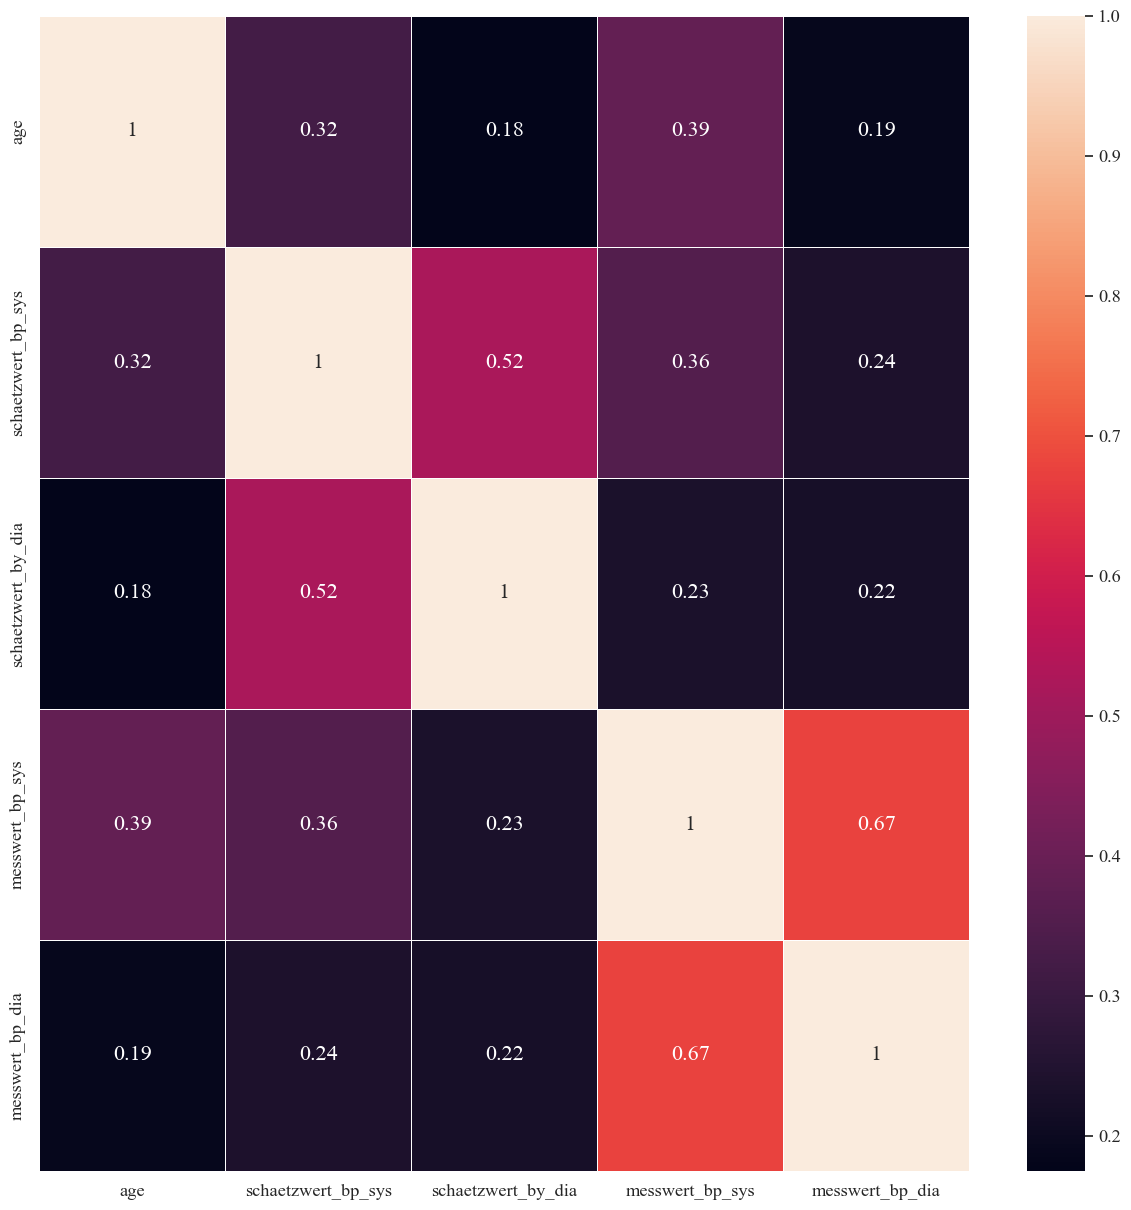

In [33]:
cols = ['age', 'schaetzwert_bp_sys', 'schaetzwert_by_dia', 'messwert_bp_sys',
       'messwert_bp_dia']
correlation_matrix = data_df[cols].corr()
fig, ax = plt.subplots(figsize=(15,15))     
plot = sns.heatmap(correlation_matrix, annot = True, linewidths=.5, ax=ax)
plt.show()
plot.figure.savefig(os.path.join(misc_dir_path, "corr_matrix.pdf"), dpi=180, bbox_inches='tight')

Scatter Plots

Index(['schaetzwert_bp_sys', 'schaetzwert_by_dia', 'messwert_bp_sys',
       'messwert_bp_dia'],
      dtype='object')


<Figure size 640x480 with 0 Axes>

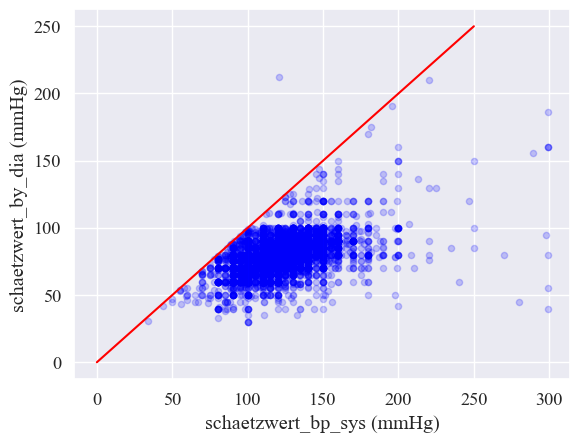

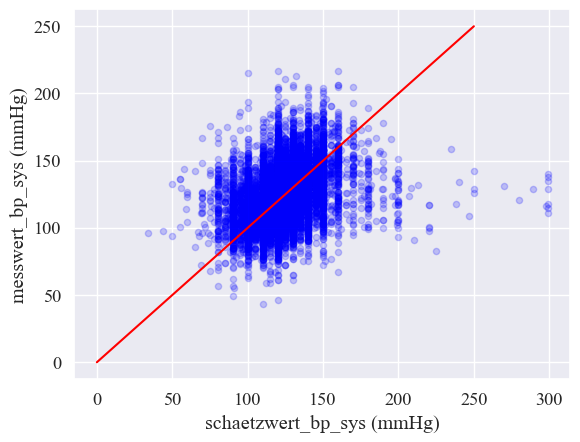

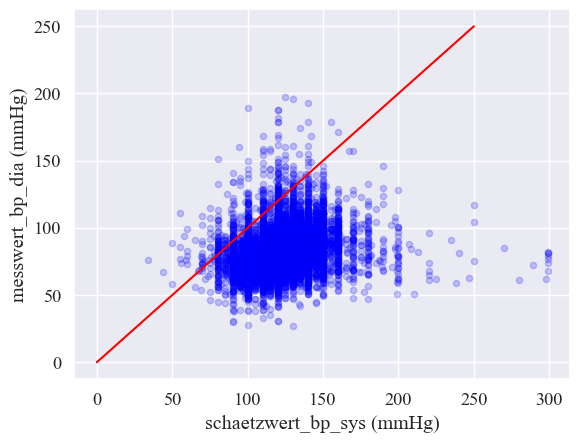

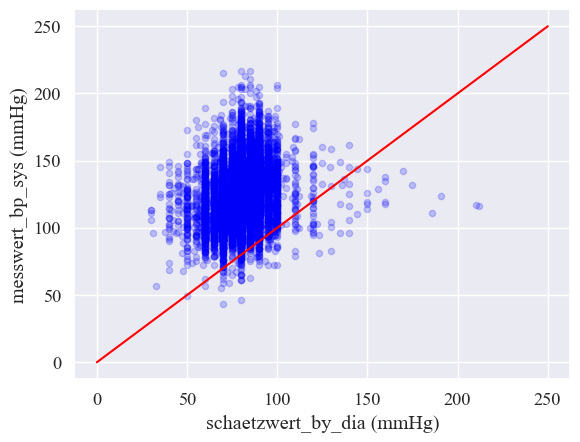

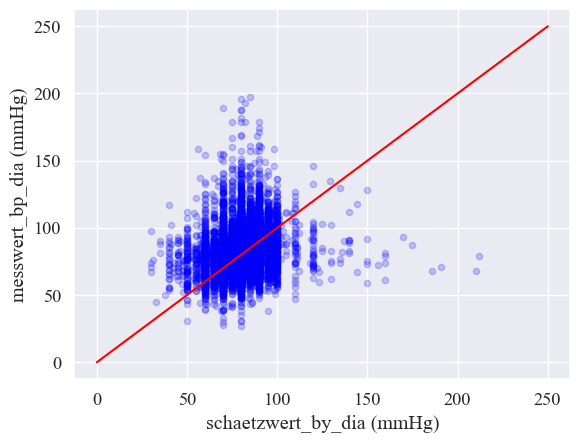

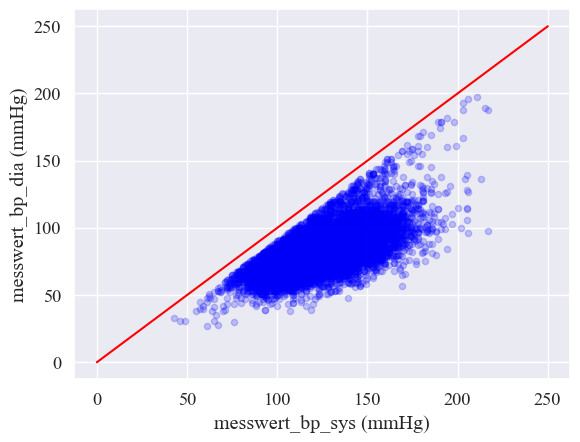

In [35]:
df_new = data_df.iloc[:, 14:18]
df_new.head()
print(df_new.columns)
col_list = list(df_new.columns)


plt.figure()
x=np.linspace(0, 250, 100)
for i in range(len(col_list)):
    for j in range(i+1, len(col_list)):
        plot = df_new.plot.scatter(col_list[i], col_list[j], label=f'{col_list[i]} vs {col_list[j]}',color=PLOT_COLOR, alpha=0.2)
        plt.xlabel(col_list[i] + " (mmHg)")
        plt.ylabel(col_list[j] + " (mmHg)")
        plt.plot(x, x, color='red')
        plot.get_legend().remove()
        plot.figure.savefig(os.path.join(misc_dir_path,col_list[i] +  "_vs_" + col_list[j] + ".pdf"), bbox_inches='tight')


plt.show()